In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
import category_encoders as ce

In [2]:
training_data = pd.read_csv('../Datasets/full_scaled_data.csv')

In [3]:
training_data.head()

,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,...,proto,service,ACC,CLO,CON,FIN,INT,REQ,RST,label
0,-0.213727,-0.124455,-0.151816,-0.043684,-0.087369,0.057181,0.71944,-0.820395,0.643913,-0.263498,...,-0.34761,-0.719547,0,0,0,0,1,0,0,0
1,-0.213728,-0.124455,-0.151816,-0.036308,-0.087369,0.286565,0.71944,-0.820395,4.539351,-0.263498,...,-0.34761,-0.719547,0,0,0,0,1,0,0,0
2,-0.213729,-0.124455,-0.151816,-0.040351,-0.087369,0.791209,0.71944,-0.820395,4.391459,-0.263498,...,-0.34761,-0.719547,0,0,0,0,1,0,0,0
3,-0.213729,-0.124455,-0.151816,-0.041330,-0.087369,0.566923,0.71944,-0.820395,2.977031,-0.263498,...,-0.34761,-0.719547,0,0,0,0,1,0,0,0
4,-0.213728,-0.124455,-0.151816,-0.034187,-0.087369,0.118350,0.71944,-0.820395,4.369219,-0.263498,...,-0.34761,-0.719547,0,0,0,0,1,0,0,0


In [4]:
training_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82332 entries, 0 to 82331
Data columns (total 49 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   dur                82332 non-null  float64
 1   spkts              82332 non-null  float64
 2   dpkts              82332 non-null  float64
 3   sbytes             82332 non-null  float64
 4   dbytes             82332 non-null  float64
 5   rate               82332 non-null  float64
 6   sttl               82332 non-null  float64
 7   dttl               82332 non-null  float64
 8   sload              82332 non-null  float64
 9   dload              82332 non-null  float64
 10  sloss              82332 non-null  float64
 11  dloss              82332 non-null  float64
 12  sinpkt             82332 non-null  float64
 13  dinpkt             82332 non-null  float64
 14  sjit               82332 non-null  float64
 15  djit               82332 non-null  float64
 16  swin               823

In [5]:
X = training_data.drop(columns=['label'])
y = training_data['label']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [7]:
classify_type = "binary"

In [8]:
training_data.columns

Index(['dur', 'spkts', 'dpkts', 'sbytes', 'dbytes', 'rate', 'sttl', 'dttl',
       'sload', 'dload', 'sloss', 'dloss', 'sinpkt', 'dinpkt', 'sjit', 'djit',
       'swin', 'stcpb', 'dtcpb', 'dwin', 'tcprtt', 'synack', 'ackdat', 'smean',
       'dmean', 'trans_depth', 'response_body_len', 'ct_srv_src',
       'ct_state_ttl', 'ct_dst_ltm', 'ct_src_dport_ltm', 'ct_dst_sport_ltm',
       'ct_dst_src_ltm', 'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd',
       'ct_src_ltm', 'ct_srv_dst', 'is_sm_ips_ports', 'proto', 'service',
       'ACC', 'CLO', 'CON', 'FIN', 'INT', 'REQ', 'RST', 'label'],
      dtype='object')

In [9]:
y = np.array(training_data.columns)

## Random Forest

In [10]:
rf = RandomForestClassifier(n_estimators=200, max_features=None, random_state=0)
rf.fit(X_train, y_train)
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

Text(0.5, 1.0, 'Features importance')

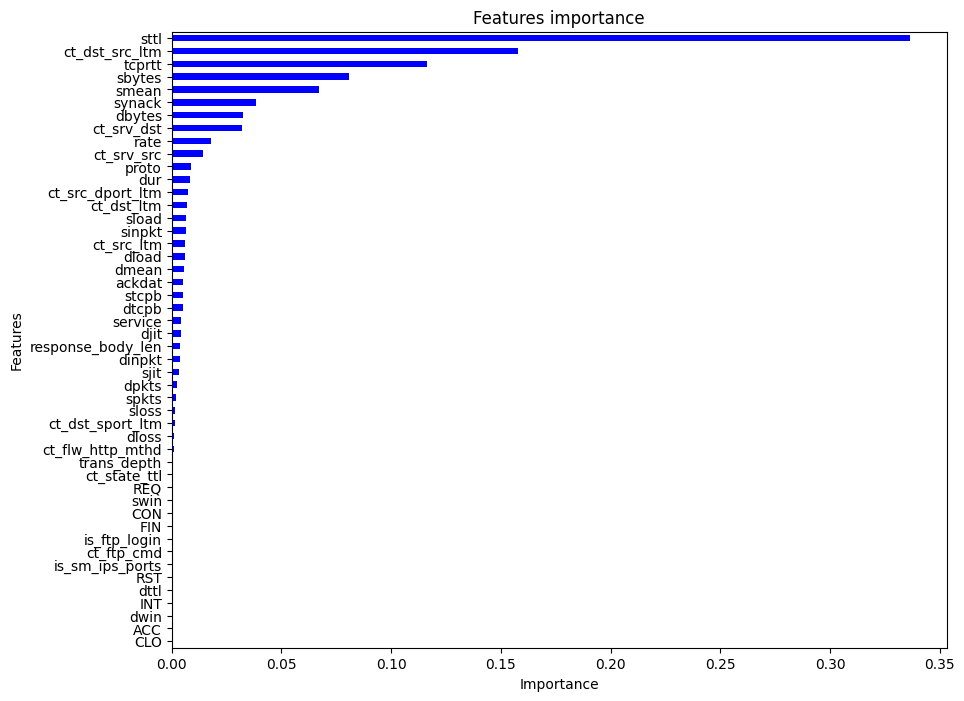

In [11]:
plt.figure(figsize=(10, 8))
importances = pd.Series(rf.feature_importances_, index=X_train.columns)
importances.sort_values(ascending=True, inplace=True)
importances.plot.barh(color='blue')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Features importance')

In [12]:
print("Accuracy:    ", accuracy_score(y_test, y_test_pred))
print("Precision:   ", precision_score(y_test, y_test_pred))
print("Recall:      ", recall_score(y_test, y_test_pred))
print("F1-score:    ", f1_score(y_test, y_test_pred))

Accuracy:     0.9771656221153379
Precision:    0.9840463458110517
Recall:       0.9743205082950935
F1-score:     0.9791592763391274


In [68]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.97      0.98      0.97      9251
           1       0.98      0.97      0.98     11332

    accuracy                           0.98     20583
   macro avg       0.98      0.98      0.98     20583
weighted avg       0.98      0.98      0.98     20583



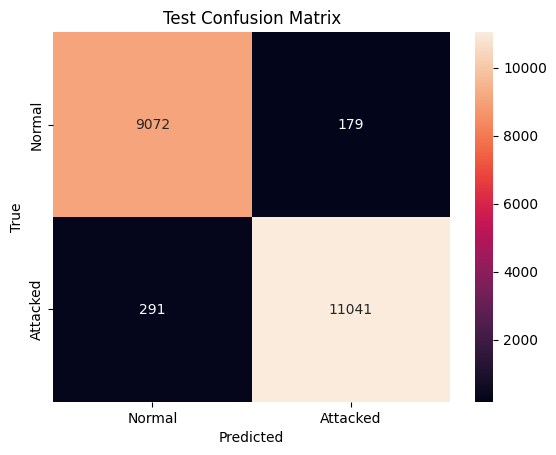

In [13]:
display_labels = {"binary":["Normal","Attacked"],"multiclass":["Normal","Generic","Exploits","Fuzzers","DoS","Reconnaissance","Analysis", "Backdoor", "Shellcode", "Worms"]}
matrix_test = sns.heatmap(confusion_matrix(y_test, y_test_pred),annot=True, fmt='d',xticklabels=display_labels[classify_type], yticklabels=display_labels[classify_type])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Test Confusion Matrix")
plt.savefig('../images/rf_test_confusion_matrix_' + classify_type + ".png", bbox_inches='tight')
plt.show()

## Decision Tree

In [14]:
from sklearn.tree import DecisionTreeClassifier

In [65]:
dt = DecisionTreeClassifier(criterion='entropy', max_depth=20, min_samples_leaf=2, min_samples_split=2)
dt.fit(X_train, y_train)
y_dt_train_pred = dt.predict(X_train)
y_dt_test_pred = dt.predict(X_test)

In [66]:
print("Accuracy:    ", accuracy_score(y_test, y_dt_test_pred))
print("Precision:   ", precision_score(y_test, y_dt_test_pred))
print("Recall:      ", recall_score(y_test, y_dt_test_pred))
print("F1-score:    ", f1_score(y_test, y_dt_test_pred))

Accuracy:     0.9696351357916727
Precision:    0.9782900026802466
Recall:       0.9662901517825626
F1-score:     0.9722530521642619


In [69]:
print(classification_report(y_test, y_dt_test_pred))

              precision    recall  f1-score   support

           0       0.96      0.97      0.97      9251
           1       0.98      0.97      0.97     11332

    accuracy                           0.97     20583
   macro avg       0.97      0.97      0.97     20583
weighted avg       0.97      0.97      0.97     20583



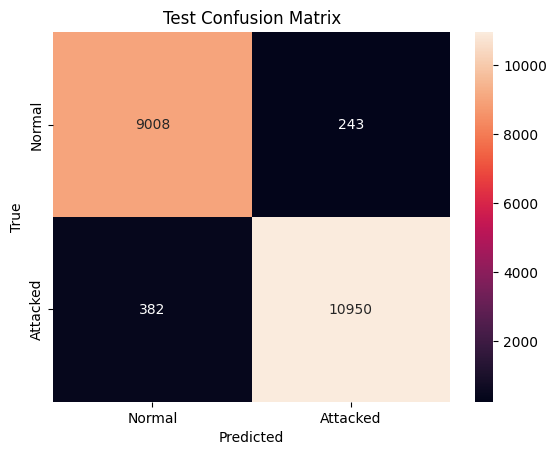

In [67]:
display_labels = {"binary":["Normal","Attacked"],"multiclass":["Normal","Generic","Exploits","Fuzzers","DoS","Reconnaissance","Analysis", "Backdoor", "Shellcode", "Worms"]}
matrix_test = sns.heatmap(confusion_matrix(y_test, y_dt_test_pred),annot=True, fmt='d',xticklabels=display_labels[classify_type], yticklabels=display_labels[classify_type])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Test Confusion Matrix")
plt.savefig('../images/dt_test_confusion_matrix_' + classify_type + ".png", bbox_inches='tight')
plt.show()